In [20]:
import pandas as pd 
import matplotlib.pyplot as pyplot 
import seaborn as sns 
import numpy as np 

# Importing TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Importing train-test split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluation
from sklearn.metrics import mean_squared_error

# Importing KNN for collaborative filtering
from sklearn.neighbors import NearestNeighbors

# Importing StandardScaler for normalization
from sklearn.preprocessing import StandardScaler


In [11]:
movies = pd.read_csv("movie_dataset.csv")
movies

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [12]:
movies.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [14]:
len(movies.columns.tolist())

24

In [16]:
useful_features = [
    'genres', 
    'keywords', 
    'overview', 
    'production_companies', 
    'production_countries', 
    'release_date', 
    'runtime', 
    'tagline', 
    'title', 
    'cast', 
    'crew', 
    'director'
]
len(useful_features)

12

In [23]:
numeric_cols = movies.select_dtypes(np.number).columns.tolist()
movies[numeric_cols] = movies[numeric_cols].astype(str)

In [30]:
# Replace null values with an empty string for text features
movies['genres'].fillna('', inplace=True)
movies['keywords'].fillna('', inplace=True)
movies['overview'].fillna('', inplace=True)
movies['production_companies'].fillna('', inplace=True)
movies['production_countries'].fillna('', inplace=True)
movies['cast'].fillna('', inplace=True)
movies['crew'].fillna('', inplace=True)
movies['director'].fillna('', inplace=True)
movies['title'].fillna('', inplace=True)
movies['tagline'].fillna('', inplace=True)

# Convert runtime to string and replace null values with '0'
movies['runtime'] = movies['runtime'].astype(str)
movies['runtime'].fillna('0', inplace=True)

# Concatenate all features into 'combined_features' column
movies['combined_features'] = (movies['genres'] + ' ' +
                               movies['keywords'] + ' ' +
                               movies['production_companies'] + ' ' +
                               movies['overview'] + ' ' +
                               movies['production_countries'] + ' ' +
                               movies['cast'] + ' ' +
                               movies['crew'] + ' ' +
                               movies['runtime'] + ' ' +
                               movies['release_date'] + ' ' +
                               movies['director'] + ' ' +
                               movies['title'] + ' ' +
                               movies['tagline'])

# Fill any remaining null values in 'combined_features' with an empty string
movies['combined_features'].fillna('', inplace=True)


In [31]:
movies["combined_features"]

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  [] A newlywed couple's honeymo...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      [] When ambitious New York attorney Sam is s...
4802    Documentary obsession camcorder crush dream gi...
Name: combined_features, Length: 4803, dtype: object

In [32]:
movies.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
combined_features          0
dtype: int64

In [33]:
# make the feature vectorsabs 

vectorizer = TfidfVectorizer()

In [35]:
feature_vectors = vectorizer.fit_transform(movies['combined_features'])

In [37]:
print(feature_vectors)

  (0, 244168)	0.005790656393365136
  (0, 203067)	0.011522086525537503
  (0, 189662)	0.01637518440069515
  (0, 13)	0.006013854253380587
  (0, 4731)	0.005692813352998465
  (0, 38910)	0.00795013457989012
  (0, 29587)	0.015923564387501532
  (0, 29729)	0.017778044295081313
  (0, 146205)	0.017778044295081313
  (0, 243797)	0.017778044295081313
  (0, 221389)	0.013989705717293714
  (0, 21483)	0.017778044295081313
  (0, 116739)	0.017778044295081313
  (0, 191240)	0.0067413544731857586
  (0, 21482)	0.016957423863099768
  (0, 116738)	0.017778044295081313
  (0, 243271)	0.016957423863099768
  (0, 21481)	0.017778044295081313
  (0, 116737)	0.017778044295081313
  (0, 237492)	0.017778044295081313
  (0, 21480)	0.016957423863099768
  (0, 116735)	0.017778044295081313
  (0, 229231)	0.016957423863099768
  (0, 226540)	0.009723570524916993
  (0, 21479)	0.017778044295081313
  :	:
  (4802, 203671)	0.044927731515204905
  (4802, 213303)	0.043186038239507195
  (4802, 188221)	0.037493393122506255
  (4802, 227918)	0.0

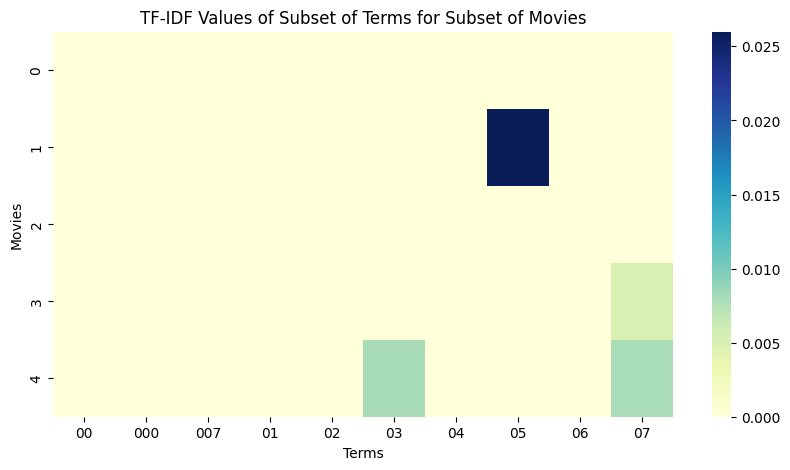

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of terms to visualize
subset_terms = vectorizer.get_feature_names_out()[:10]  # Top 10 terms
# Subset of movies to visualize
subset_movies = 5  # Number of movies to visualize

# Get TF-IDF values for subset of terms and movies
subset_tfidf_matrix = feature_vectors[:subset_movies, :len(subset_terms)]

# Convert sparse matrix to array for visualization
subset_tfidf_array = subset_tfidf_matrix.toarray()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(subset_tfidf_array, cmap="YlGnBu", xticklabels=subset_terms, yticklabels=range(subset_movies))
plt.title('TF-IDF Values of Subset of Terms for Subset of Movies')
plt.xlabel('Terms')
plt.ylabel('Movies')
plt.show()


In [40]:
similarity = cosine_similarity(feature_vectors)

In [42]:
similarity.shape

(4803, 4803)

In [43]:
import difflib

In [54]:
# get a user input of movie 
user_input = input("Enter your Movie: ")

Enter your Movie:  mortal kombat


In [51]:
# get the title of the movies in the dataset 
all_movies = movies["title"]
len(all_movies)

4803

In [58]:
# gietting the close matches to user input 
find_close_match = difflib.get_close_matches(user_input, all_movies)

In [56]:
find_close_match

['Mortal Kombat']

In [57]:
# selecting the first close match 
close_match = find_close_match[0]

In [77]:
# getting the index of the cloase match 
index_of_close_match = movies[movies["title"] == close_match].index.values[0]
index_of_close_match

2100

In [78]:
movies.loc[index_of_close_match].title

'Mortal Kombat'

In [84]:
# make the ssimilarity score 

similarity_scores = list(enumerate(similarity[index_of_close_match]))

In [89]:
similarity_scores[: 5]

[(0, 0.3420337529360705),
 (1, 0.31643143710729693),
 (2, 0.35113795693774064),
 (3, 0.37539407791742246),
 (4, 0.3533605858103796)]

In [90]:
# sorting the similarity scores in descending order 
sorted_similar_scores = sorted(similarity_scores, key= lambda x: x[1], reverse=True)

In [99]:
i = 0

for movie in sorted_similar_scores: 
    index = movie[0]
    title_from_index = movies[movies.index == index]["title"].values[0]
    print(i, title_from_index)
    i += 1
    if i == 29: 
        break

0 Mortal Kombat
1 Mortal Kombat: Annihilation
2 Austin Powers in Goldmember
3 Catwoman
4 Terminator 3: Rise of the Machines
5 Alexander
6 The Bourne Supremacy
7 Master and Commander: The Far Side of the World
8 The Bourne Ultimatum
9 Collateral Damage
10 Batman Begins
11 Cursed
12 Bad Boys II
13 Men in Black II
14 Resident Evil: Apocalypse
15 Harry Potter and the Philosopher's Stone
16 The Aviator
17 Hulk
18 Ant-Man
19 Around the World in 80 Days
20 Minority Report
21 xXx
22 Blade
23 The Core
24 The Dark Knight Rises
25 Freddy vs. Jason
26 Blade: Trinity
27 Harry Potter and the Prisoner of Azkaban
28 Black Hawk Down


In [93]:
title_from_index

4553    America Is Still the Place
Name: title, dtype: object